In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from scipy.stats import f_oneway, ttest_ind, chi2_contingency, chisquare

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("D:\\Book\\Car details v3.csv")
print(dataset.shape)
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True,drop=True)
print(dataset.shape)

(8128, 13)
(7906, 13)


In [3]:
#basic data cleaning based on common sense
dataset = dataset[(dataset['km_driven']>=0) & (dataset['mileage']!='0.0kmpl') & (dataset['max_power']!='bhp')]
dataset.reset_index(inplace=True,drop=True)

dataset['mileage']=pd.to_numeric(dataset['mileage'].str.split(n=1, expand=True)[0])
dataset['engine']=pd.to_numeric(dataset['engine'].str.split(n=1, expand=True)[0])
dataset['max_power']=pd.to_numeric(dataset['max_power'].str.split(n=1, expand=True)[0])

# dataset['mileage']=dataset['mileage'].astype(int)
# dataset['engine']=dataset['engine'].astype(int)
# dataset['max_power']=dataset['max_power'].astype(int)

dataset.shape

(7906, 13)

In [4]:
dataset.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
torque            object
seats            float64
dtype: object

### Numerical Features

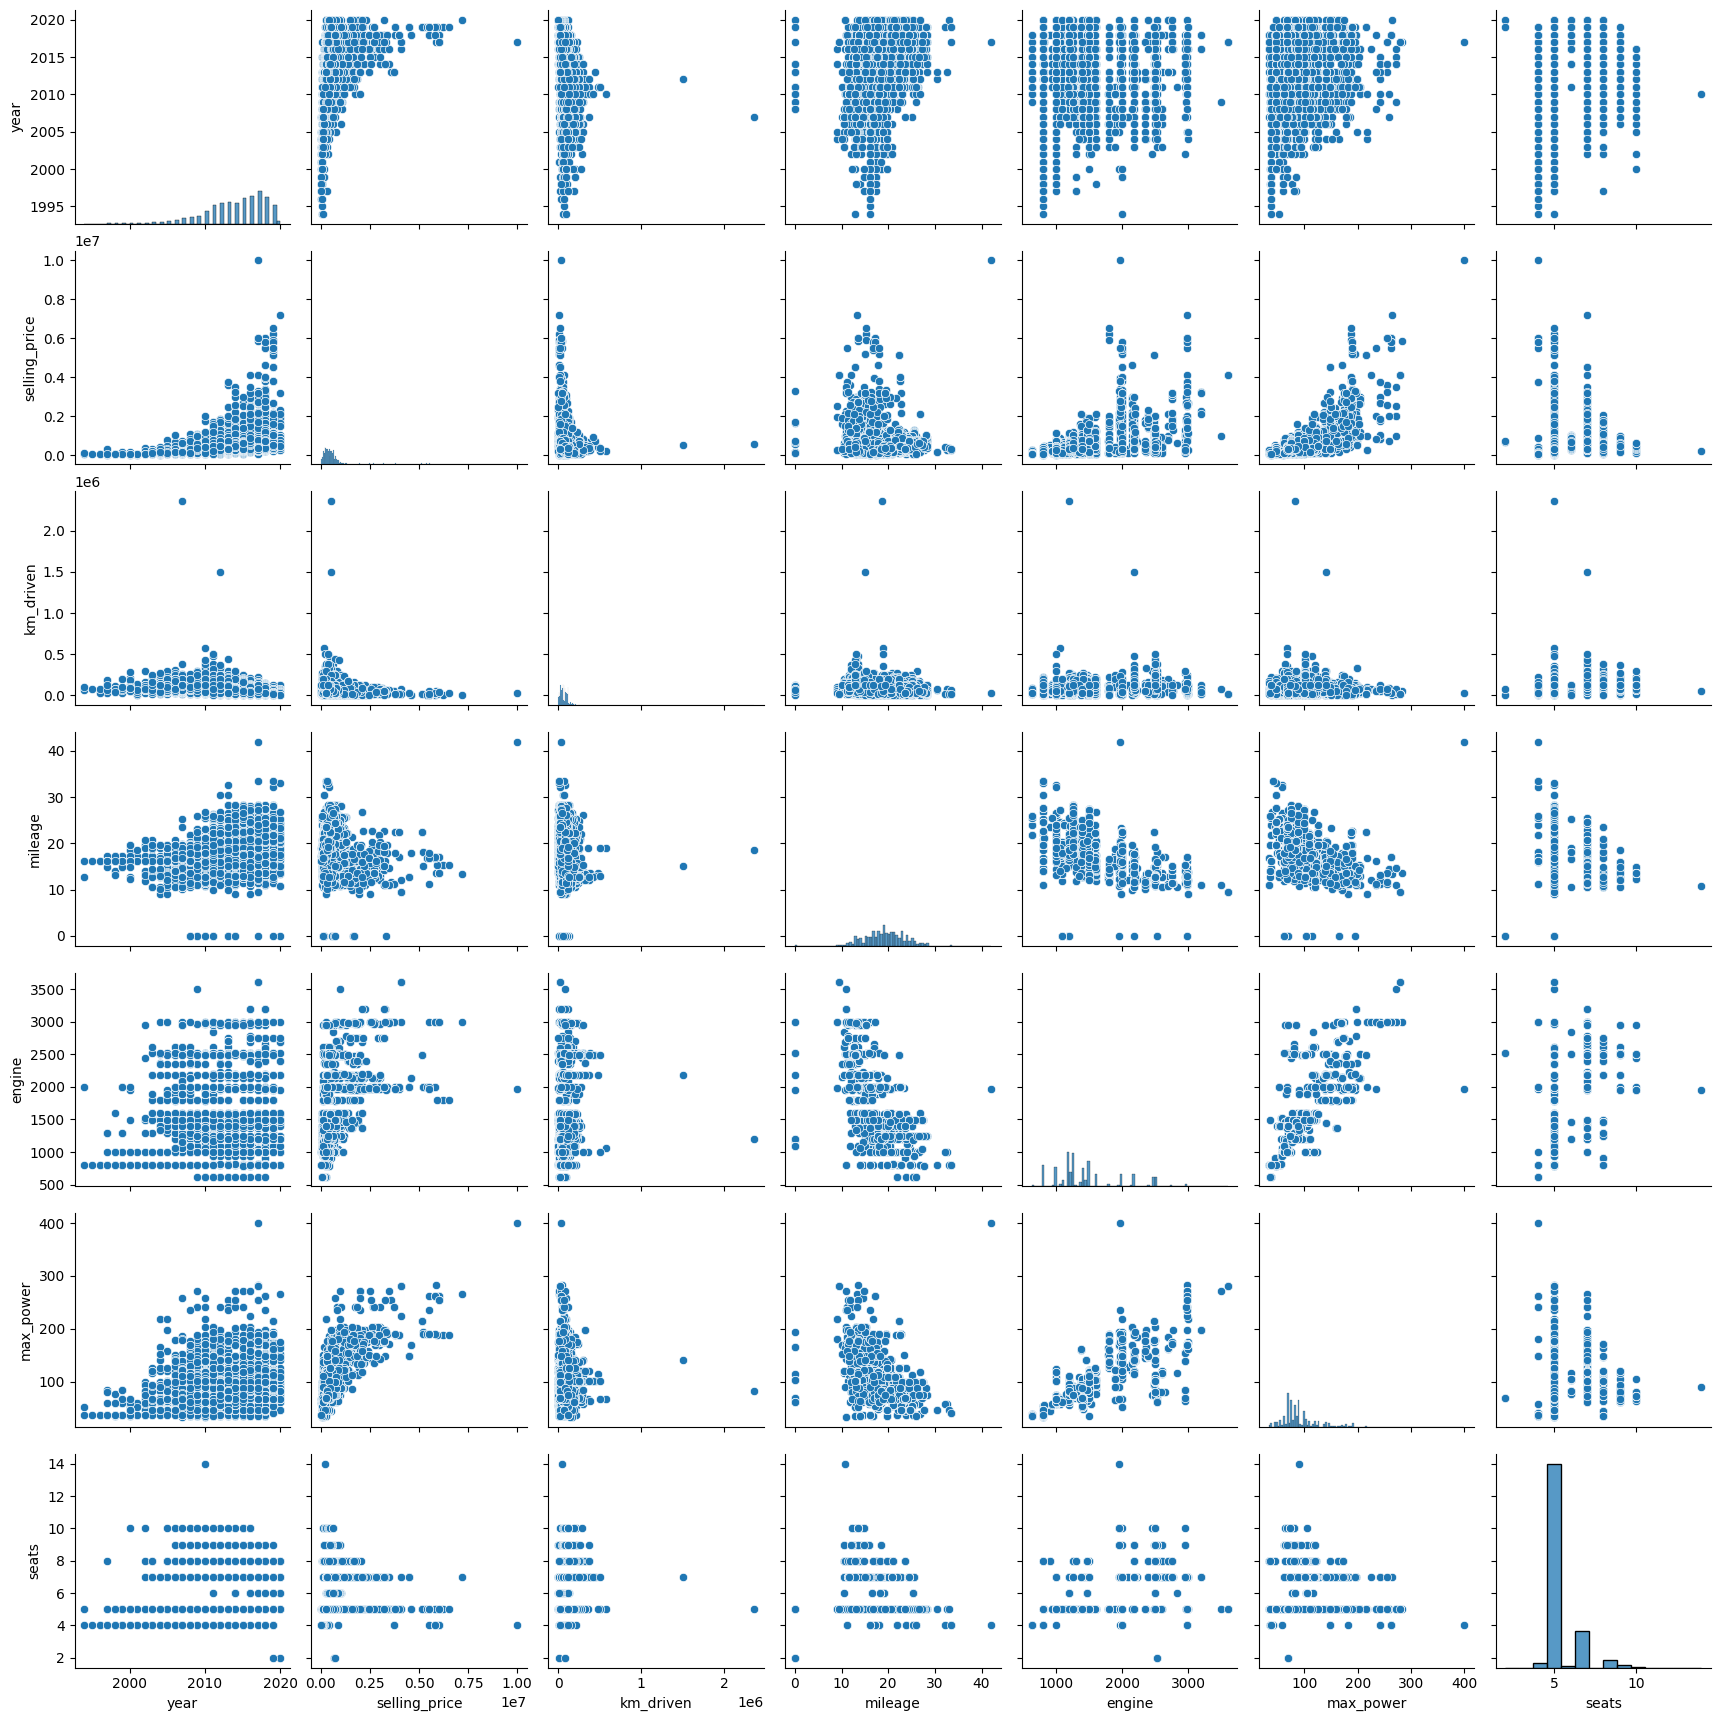

In [5]:
#pairplot
sns.pairplot(dataset)
plt.show()

<AxesSubplot: >

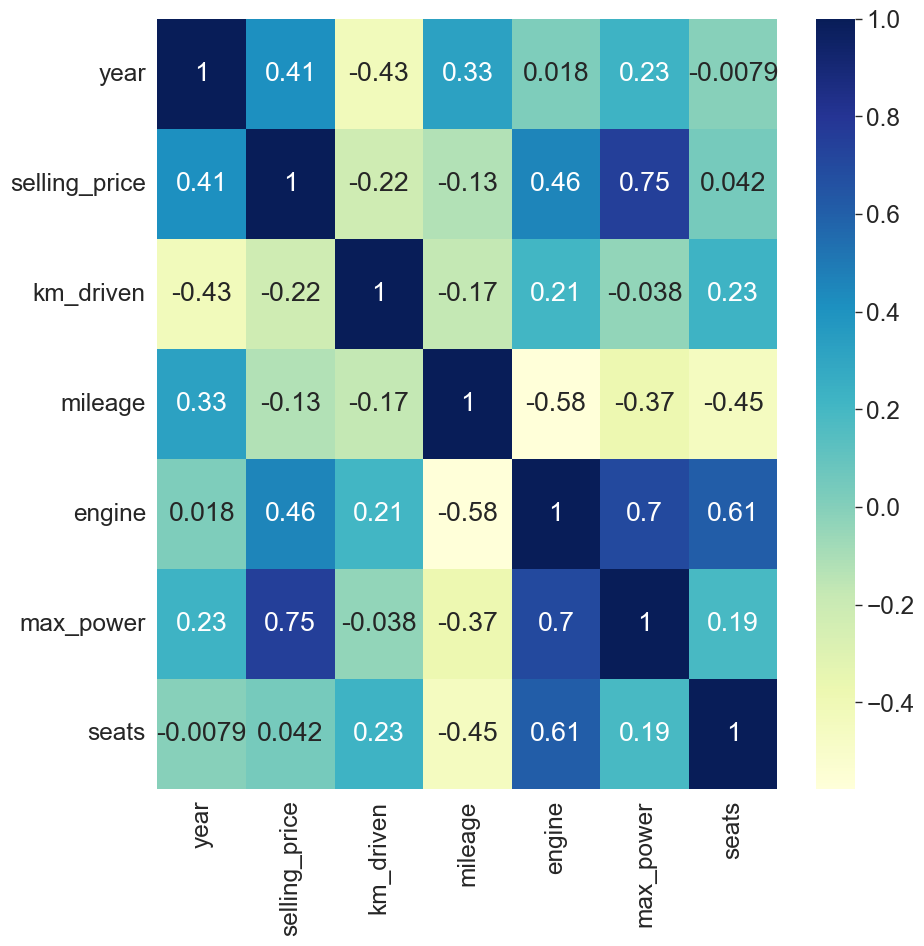

In [6]:
#correlation heatmap

sns.set(rc={'figure.figsize':(10,10)})
sns.set_context('paper', font_scale = 2)
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)

## Categorical Features

First Owner             65.96
Second Owner            25.50
Third Owner              6.45
Fourth & Above Owner     2.02
Test Drive Car           0.06
Name: owner, dtype: float64

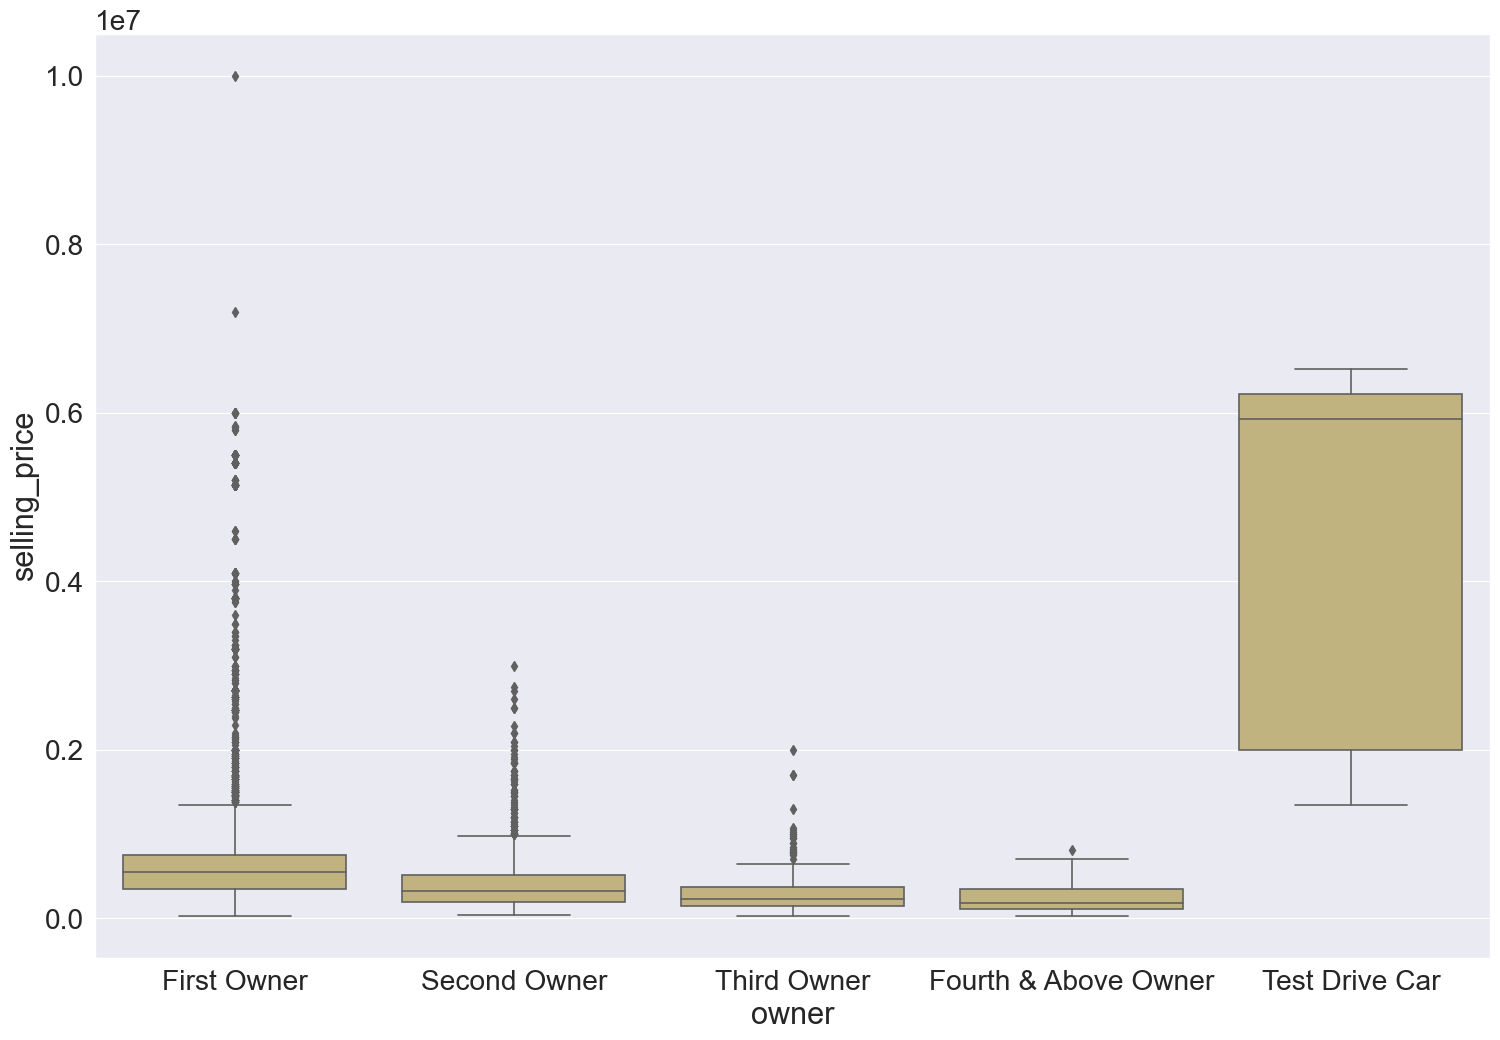

In [7]:
color = 'y'
pal = {'First Owner':color, 'Second Owner':color, 'Third Owner':color,
       'Fourth & Above Owner':color, 'Test Drive Car':color}

sns.set(rc={'figure.figsize':(18,12)})
sns.set(style="darkgrid")
sns.set_context('paper', font_scale = 2.3)
sns.boxplot(x = 'owner', y = 'selling_price', data = dataset,palette=pal)
#sns.despine()
np.round(dataset['owner'].value_counts(normalize=True)*100,2)

<AxesSubplot: xlabel='owner'>

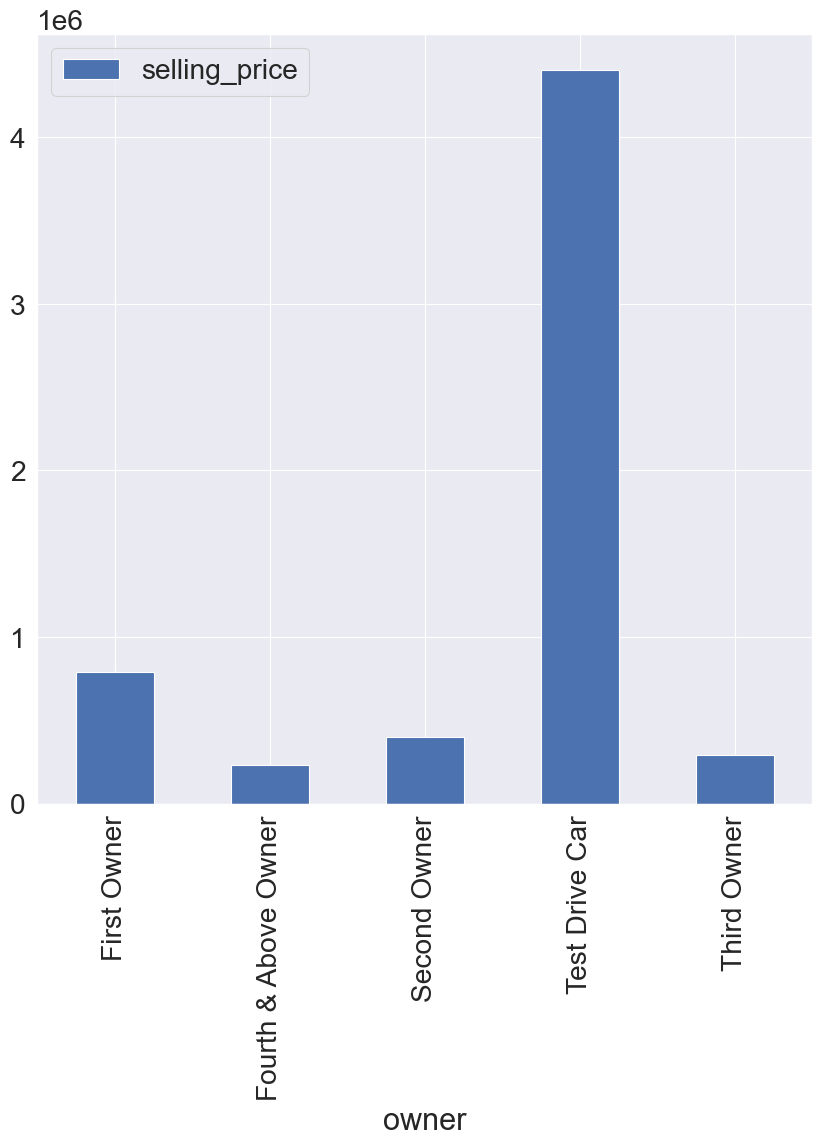

In [8]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set(style="darkgrid")
sns.set_context('paper', font_scale = 2.3)
dataset[['selling_price','owner']].groupby('owner').mean().plot.bar()

In [9]:
#create features for car brand, which is the first word 
dataset['brand']=dataset['name'].str.split().str[0]
#create features for car brand and model, which is the first and second word
dataset['brandAndModel']=dataset['brand']+" "+dataset['name'].str.split().str[1]

In [10]:
##check name of cars above 90 percentile sellinng price
percentile=90
dataset3=dataset[dataset['selling_price']>=np.percentile(dataset['selling_price'],percentile)]
dataset4=dataset[dataset['selling_price']<np.percentile(dataset['selling_price'],percentile)]

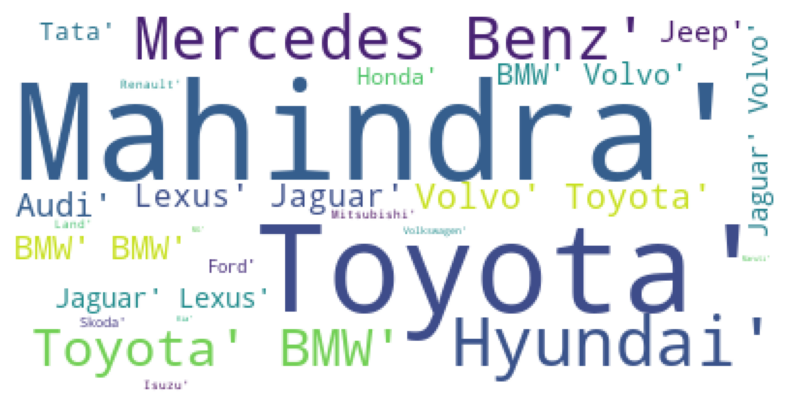

In [11]:
#WordCloud for cars aove 90 percentile selling price

text = dataset3['brand'].values 
wordcloud = WordCloud(background_color='white').generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
percentile=90
nineteenth_percentile = np.percentile(dataset['selling_price'],percentile)

dataset['Above90']=np.where(dataset['selling_price']>nineteenth_percentile,1,0)

samples=[]
for condition in dataset.groupby('Above90')['selling_price']:
    samples.append(condition[1].values)
f_val, p_val = f_oneway(*samples)

if p_val<=0.05:
    print('Null hypothesis rejected, there is difference between these groups')

Null hypothesis rejected, there is difference between these groups


In [13]:
pd.set_option('display.float_format', lambda x: f'%.{len(str(x%1))-2}f' % x)


In [14]:
dataset['selling_price'].describe()

count                    7906.0
mean    649813.7208449279423803
std     813582.7483541326364502
min                     29999.0
25%                    270000.0
50%                    450000.0
75%                    690000.0
max                  10000000.0
Name: selling_price, dtype: float64

In [15]:
np.percentile(dataset['selling_price'],10)

160000.0